In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import json
from collections import Counter

from sklearn import preprocessing
import pytz
import datetime
from statsmodels.regression.linear_model import RegressionResults
import statsmodels.api as sm
from statsmodels.formula.api import ols
import re

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction import text
from nltk import pos_tag
import random
import nltk
from numpy import linalg as LA
from sklearn.decomposition import TruncatedSVD
from sklearn.svm import LinearSVC
from sklearn.decomposition import NMF


from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
#from sklearn import metrics
from sklearn.linear_model import LogisticRegression as LR
from sklearn.naive_bayes import GaussianNB as GNB

from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.svm import SVC

from sklearn.metrics import plot_confusion_matrix
from sklearn import metrics

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier

In [2]:
tweetFiles = ["tweets/tweets_#gohawks.txt",
              "tweets/tweets_#gopatriots.txt",
              "tweets/tweets_#nfl.txt",
              "tweets/tweets_#patriots.txt",
              "tweets/tweets_#sb49.txt",
              "tweets/tweets_#superbowl.txt" ]

In [3]:
locations_wa = []
locations_ma = []
tweet_text = []
tweet_location = []
count_ma = 0
count_wa = 0
MA = ["ma", "boston", "massachusetts", "foxborough"]
WA = ["wa", "seattle", "washington", "kirkland","spokane","tacoma"]
WA_not = ["d.c.","dc"]
for tweetFile in tweetFiles:
    with open(tweetFile,'r',encoding='utf8') as tweetData:
        for line in tweetData:
            data = json.loads(line)
            location = data['tweet']['user']['location']
            loc = re.split(', | ', location.lower())
            flg_wa = False
            flg_ma = False
            flg_nwa = False
            for loc_ma in MA:
                if loc_ma in loc:
                    flg_ma = True
                    break
                    
            for loc_wa in WA:
                if loc_wa in loc:
                    for loc_nwa in WA_not:
                        if loc_nwa in loc:
                            flg_nwa = True
                            break
                    if flg_nwa:
                        break
                    else:
                        flg_wa = True
                    break
            if flg_ma and not flg_wa:
                locations_ma.append(location)
                tweet_location.append('MA')
                tweet_text.append(data['tweet']['text'])
                count_ma += 1
            elif flg_wa and not flg_ma:
                locations_wa.append(location)
                tweet_location.append('WA')
                tweet_text.append(data['tweet']['text'])
                count_wa += 1

In [4]:
dma = {'MA Locations': locations_ma}
dfma = pd.DataFrame(data=dma)
pd.set_option('display.max_rows', 1000)
dfma.head(500)

,MA Locations
0,Boston
1,Boston
2,Boston
3,Boston
4,Boston
5,Pennsylvania / Massachusetts
6,"Boston, MA"
7,Pennsylvania / Massachusetts
8,Boston
9,Boston


In [5]:
dwa = {'WA Locations': locations_wa}
dfwa = pd.DataFrame(data=dwa)
pd.set_option('display.max_rows', 1000)
dfwa.head(500)

,WA Locations
0,"Redmond, WA"
1,Seattle
2,"McChord AFB, WA"
3,Washington state
4,Greater Seattle Area
5,Washington
6,"Bellevue, WA"
7,"N.W. Washington State, USA"
8,Washington #PNW
9,"Seattle, WA"


In [6]:
d = {'Location': tweet_location , 'Text': tweet_text}
df = pd.DataFrame(data=d)
pd.set_option('display.max_rows', 1000)
df.sample(500)

,Location,Text
104543,WA,@pewdiepie u guna watch da game? #SB49
73728,MA,Aw. Via @thebostoncal #Patriots #patriotsvscol...
155143,MA,Awwwwwwww man... Missy stuntin &amp; giving Ka...
50008,WA,Time to drown my sorrows with ice cream #gohawks
42988,WA,Much louder cheers for the #Seahawks! #GoHawks...
146756,WA,For!! @rodmoose: Are you for or against @Seaha...
45606,WA,You still with me @sonarriley ?\n#GoHawks
114469,WA,I've got the @Seahawks winning #SB49! #Seahawk...
62448,WA,"#NFL #Seahawks #Card Russell Wilson, Richard S..."
13984,WA,Here we go again......#GoHawks!!


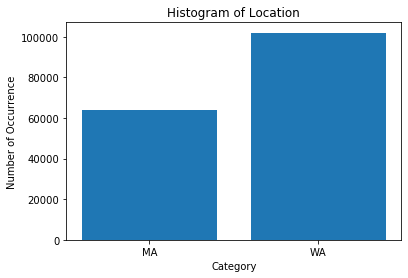

In [7]:
category, total = np.unique(df.Location, return_counts=True)
plt.bar(category,total)
plt.title('Histogram of Location')
plt.xlabel('Category')
plt.ylabel('Number of Occurrence')
plt.xticks(rotation='horizontal')
plt.show()

In [8]:
df_by_loc = df.groupby('Location')
df_ma = df_by_loc.get_group('MA')
df_wa = df_by_loc.get_group('WA')
sample_size = min([df_ma.shape[0],df_wa.shape[0]])
df_ma_rs = df_ma.sample(sample_size)
df_wa_rs = df_wa.sample(sample_size)
frames = [df_ma_rs, df_wa_rs]
df_rs = pd.concat(frames)
df_final = df_rs.sample(frac=1).reset_index(drop=True)
df_final.head(100)

,Location,Text
0,MA,"Ok cool the cute opening act was fun, now let'..."
1,WA,"""@nfl: The @Seahawks are ROLLING! #SB49 http:/..."
2,WA,Swedish's Cancer Takedown : Love it and Sherma...
3,MA,Do I need to say more?? #TOMBRADY #AFCChampion...
4,WA,I may be in Miami but still cheering on my Sea...
5,MA,"""The #Patriots, also known as the Brady Bunch...."
6,WA,Nice Budweiser ad... #SB49 #SuperBowl
7,MA,Ray Lewis: Only Reason Tom Brady Is Known Is B...
8,MA,#NFL #football Even Dawn Wells (#MaryAnn)is ro...
9,WA,I've got the @Seahawks winning #SB49! #Seahawk...


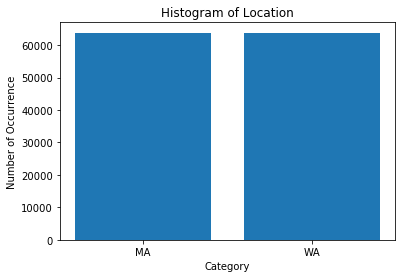

In [9]:
category, total = np.unique(df_final.Location, return_counts=True)
plt.bar(category,total)
plt.title('Histogram of Location')
plt.xlabel('Category')
plt.ylabel('Number of Occurrence')
plt.xticks(rotation='horizontal')
plt.show()

In [10]:
lb = preprocessing.LabelBinarizer()
lb_binary = lb.fit_transform(df_final['Location'])
df_final['Location Binary'] = lb_binary
df_final.head(100)

,Location,Text,Location Binary
0,MA,"Ok cool the cute opening act was fun, now let'...",0
1,WA,"""@nfl: The @Seahawks are ROLLING! #SB49 http:/...",1
2,WA,Swedish's Cancer Takedown : Love it and Sherma...,1
3,MA,Do I need to say more?? #TOMBRADY #AFCChampion...,0
4,WA,I may be in Miami but still cheering on my Sea...,1
5,MA,"""The #Patriots, also known as the Brady Bunch....",0
6,WA,Nice Budweiser ad... #SB49 #SuperBowl,1
7,MA,Ray Lewis: Only Reason Tom Brady Is Known Is B...,0
8,MA,#NFL #football Even Dawn Wells (#MaryAnn)is ro...,0
9,WA,I've got the @Seahawks winning #SB49! #Seahawk...,1


In [11]:

X_train, X_test, y_train, y_test = train_test_split(df_final['Text'], df_final['Location Binary'], 
                                                    test_size=0.2, shuffle=True, random_state=42)

In [12]:
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\rahul\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\rahul\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [13]:
wnl = nltk.wordnet.WordNetLemmatizer()

def penn2morphy(penntag):
    """ Converts Penn Treebank tags to WordNet. """
    morphy_tag = {'NN':'n', 'JJ':'a',
                  'VB':'v', 'RB':'r'}
    try:
        return morphy_tag[penntag[:2]]
    except:
        return 'n'
    
def lemmatize_sent_demo(text):
    # Text input is string, returns array of lowercased strings(words).
    return [wnl.lemmatize(word.lower(), pos=penn2morphy(tag)) 
            for word, tag in pos_tag(nltk.word_tokenize(text))]
def lemmatize_sent(list_word):
    # Text input is string, returns array of lowercased strings(words).
    return [wnl.lemmatize(word.lower(), pos=penn2morphy(tag)) 
            for word, tag in pos_tag(list_word)]

def lemmatize_rmv_num(text):
    # Text input is string, returns array of lowercased strings(words).
    lemmatized_text = []
    for word, tag in pos_tag(nltk.word_tokenize(text)):
        if not word.isdigit():
            lemmatized_text.append(wnl.lemmatize(word.lower(), pos=penn2morphy(tag))) 
    return lemmatized_text

In [14]:
analyzer = CountVectorizer().build_analyzer()
def remove_num(doc):
    return [word for word in lemmatize_sent(analyzer(doc)) if not word.isdigit()]

def remove_num_without_lemmatize(doc):
    return [word for word in (analyzer(doc)) if not word.isdigit()]

vectorizer = CountVectorizer(analyzer=remove_num,stop_words = 'english',min_df = 3)
vectorizer

CountVectorizer(analyzer=<function remove_num at 0x00000259032E4A60>,
                binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=3,
                ngram_range=(1, 1), preprocessor=None, stop_words='english',
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [15]:
tfidf_transformer = TfidfTransformer(smooth_idf=False)

X_train_count = vectorizer.fit_transform(X_train)
X_train_tfidf=tfidf_transformer.fit_transform(X_train_count)
X_test_tfidf = tfidf_transformer.transform(vectorizer.transform(X_test))
print(X_train_tfidf.shape)
print(X_test_tfidf.shape)

(102150, 13854)
(25538, 13854)


In [16]:
svd = TruncatedSVD(n_components=50, random_state=42)
X_train_reduced_lsi = svd.fit_transform(X_train_tfidf)

In [17]:
X_test_reduced_lsi = svd.transform(X_test_tfidf)
print(X_test_reduced_lsi.shape)

(25538, 50)


In [18]:
def plot_roc(y_train, scores):
    fig, ax = plt.subplots()
    
    fpr, tpr, t = metrics.roc_curve(y_train, scores)
    
    roc_auc = auc(fpr,tpr)

    ax.plot(fpr, tpr, lw=2, label= 'area under curve = %0.4f' % roc_auc)

    ax.grid(color='0.7', linestyle='--', linewidth=1)

    ax.set_xlim([-0.1, 1.1])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate',fontsize=15)
    ax.set_ylabel('True Positive Rate',fontsize=15)

    ax.legend(loc="lower right")

    for label in ax.get_xticklabels()+ax.get_yticklabels():
        label.set_fontsize(15)
        
def plot_confM(Estimator,X_test,Y_test,class_names):
    disp = plot_confusion_matrix(Estimator, X_test, Y_test,
                                 cmap=plt.cm.Blues,
                                 display_labels=class_names,
                                 normalize=None,xticks_rotation=0,values_format='d')
    disp.ax_.set_title('Confusion Matrix')
    
# -1-> comp, 1->rec
def confusion_matrix_parameters(true_label,predicted_label):
    print('Accuracy:', metrics.accuracy_score(true_label, predicted_label))
    print('Precision:', metrics.precision_score(true_label, predicted_label))
    print('Recall:', metrics.recall_score(true_label, predicted_label))
    print('F1:', metrics.f1_score(true_label, predicted_label))

In [19]:
def best_param(model,kargs,train_set,test_set,train_label,test_label):
    k_list=np.arange(-3,4,dtype='float')
    scores=[]
    for k in k_list:
        C=10**k
        clf=model(C=C,**kargs)
        # f1_macro: http://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
        # https://scikit-learn.org/stable/modules/cross_validation.html
        scores.append(np.mean(cross_val_score(clf, train_set, train_label, 
                                              cv=5, scoring='accuracy',n_jobs = -1)))
    k_best=k_list[np.argmax(np.array(scores))]
    score_best = scores[np.argmax(np.array(scores))]
    plt.plot(k_list,scores,label='best k is {:.4f}, C={:.4f}'.format(k_best, 10**k_best))
    plt.xlabel('k')
    plt.ylabel('5-fold mean accuracy')
    plt.title('Best Score: {0:.2f} for C: {1}'.format(score_best,10**k_best))
    plt.legend()
    #plt.title(str(model))
    C_best = 10**k_best
    clf=model(C=10**k_best,**kargs)
    clf.fit(train_set,train_label)
    
    clf_prediction = clf.predict(test_set)
    clf_prediction_score = clf.decision_function(test_set)

    plot_roc(test_label,clf_prediction_score) #roc
    plot_confM(clf,test_set,test_label,['MA','WA']) #confusion matrix
    confusion_matrix_parameters(test_label,clf_prediction)
    return C_best

## SVM

Accuracy: 0.8968987391338398
Precision: 0.9625354950993863
Recall: 0.8253220232485077
F1: 0.8886633684299547


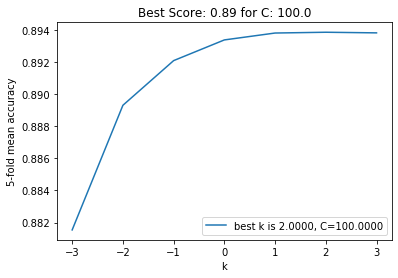

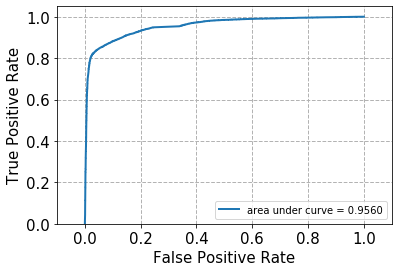

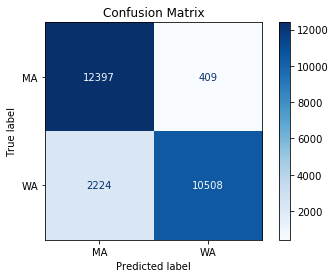

In [20]:
# Dimensionality reduction using LSI
model=SVC # Linear SVC CV
kargs={'kernel':'linear'}
C_best_svm = best_param(model,kargs,X_train_reduced_lsi,X_test_reduced_lsi,y_train,y_test)

## Logistic Regression

Accuracy: 0.9015976192340825
Precision: 0.9551082212523381
Recall: 0.8422086082312285
F1: 0.895112483826537


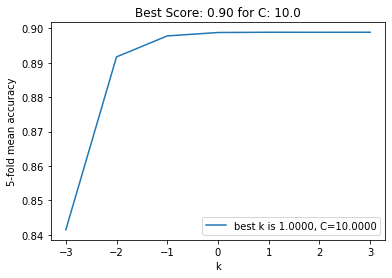

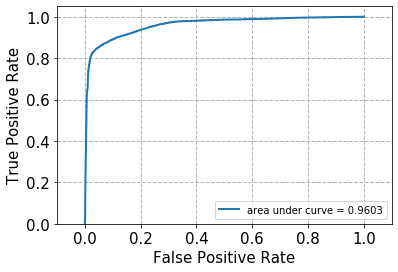

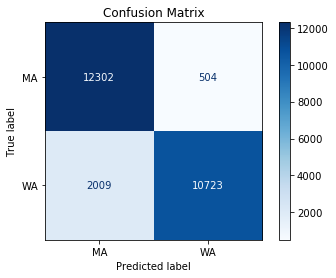

In [21]:
model=LR  # "L1" regulization
kargs={'penalty':'l1','solver':'liblinear'}
C_best_LR_l1 = best_param(model,kargs,X_train_reduced_lsi,X_test_reduced_lsi,y_train,y_test)

Accuracy: 0.9009711018873835
Precision: 0.9559388685315935
Recall: 0.8400879673264217
F1: 0.8942769951089001


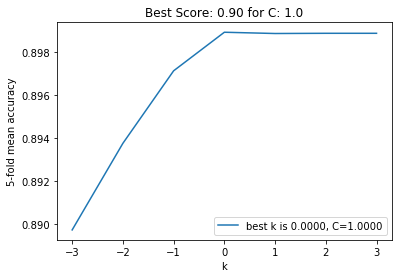

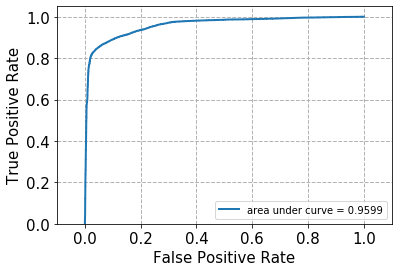

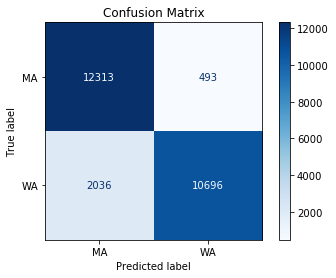

In [22]:
model=LR  #L2 regularization
kargs={'penalty':'l2','max_iter': 10000}
C_best_LR_l2 = best_param(model,kargs,X_train_reduced_lsi,X_test_reduced_lsi,y_train,y_test)

## GaussianNB

Accuracy: 0.7823635366904221
Precision: 0.7477552148086752
Recall: 0.8502984605717876
F1: 0.795736861447997


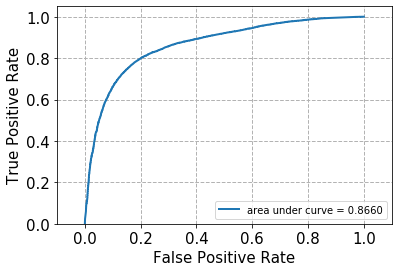

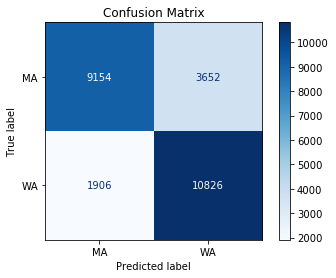

In [23]:
# Naive Bayes part
gnb_lsi=GNB()

gnb_lsi.fit(X_train_reduced_lsi,y_train)
scores_gnb_lsi=gnb_lsi.predict_log_proba(X_test_reduced_lsi)[:,1]
pred_gnb_lsi=gnb_lsi.predict(X_test_reduced_lsi)

plot_roc(y_test,scores_gnb_lsi) #roc

plot_confM(gnb_lsi,X_test_reduced_lsi,y_test,['MA','WA']) #confusion matrix

confusion_matrix_parameters(y_test,pred_gnb_lsi)

## Random Forest

C:\Anaconda3\envs\ece219_3\lib\site-packages\sklearn\ensemble\_forest.py:704: RuntimeWarning: divide by zero encountered in log
  return np.log(proba)
C:\Anaconda3\envs\ece219_3\lib\site-packages\numpy\core\fromnumeric.py:90: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


Accuracy: 0.9122875714621349
Precision: 0.9493746787733425
Recall: 0.8704838202953189
F1: 0.9082192903384413


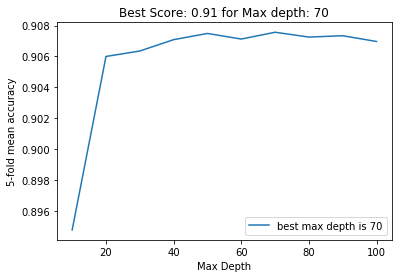

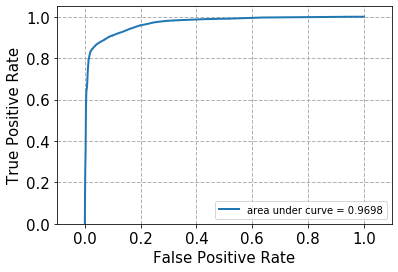

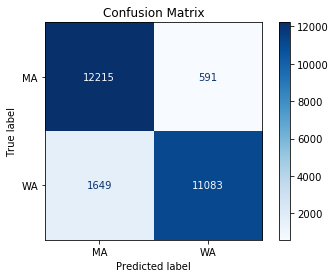

In [27]:
depth_list=np.arange(10,110,10)
scores=[]
for depth in depth_list:
    rfc=RandomForestClassifier(max_depth=depth)
    scores.append(np.mean(cross_val_score(rfc, X_train_reduced_lsi, y_train, 
                                          cv=5, scoring='accuracy',n_jobs = -1)))
depth_best=depth_list[np.argmax(np.array(scores))]
score_best = scores[np.argmax(np.array(scores))]
plt.plot(depth_list,scores,label='best max depth is {}'.format(depth_best))
plt.xlabel('Max Depth')
plt.ylabel('5-fold mean accuracy')
plt.title('Best Score: {0:.2f} for Max depth: {1}'.format(score_best,depth_best))
plt.legend()

rfc=RandomForestClassifier(max_depth=depth_best)
rfc.fit(X_train_reduced_lsi,y_train)
    
rfc_prediction = rfc.predict(X_test_reduced_lsi)
rfc_prediction_score = rfc.predict_log_proba(X_test_reduced_lsi)[:,1]

plot_roc(y_test,np.nan_to_num(rfc_prediction_score)) #roc
plot_confM(rfc,X_test_reduced_lsi,y_test,['MA','WA']) #confusion matrix
confusion_matrix_parameters(y_test,rfc_prediction)